In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
fitbit_df = pd.read_csv('../../../../data/client_data/cleaned/fitbit/cleaned_fitbit_grouped_dups.csv')
fitbit_df.head()

,id,sleep_target,sleep_value,steps,calories_target,calories_value,createdAt,updatedAt,intensity,min_heart_rate,max_heart_rate,user/id,user/email,user/full_name,user/disable_survey
0,13,480,403.0,8416.0,2048.0,1748.0,2023-05-08 17:56:01.406000+00:00,2023-05-09 23:56:02.232000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,18,480,383.0,9753.0,2048.0,1848.0,2023-05-10 00:00:03.442000+00:00,2023-05-11 23:56:04.105000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,23,480,462.0,273.0,2048.0,1199.0,2023-05-12 00:00:03.483000+00:00,2023-05-13 23:56:03.522000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,28,480,421.0,2504.0,2048.0,745.0,2023-05-14 00:00:03.142000+00:00,2023-05-15 10:28:03.909000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,33,480,421.0,11681.0,2048.0,2025.0,2023-05-15 12:00:04.019000+00:00,2023-05-15 23:55:04.824000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# remove null values:
fitbit_df = fitbit_df[(~fitbit_df['min_heart_rate'].isna()) & (~fitbit_df['max_heart_rate'].isna())]

In [5]:
specific_user_id = 109

In [6]:
fitbit_df['createdAt'] = pd.to_datetime(fitbit_df['createdAt'])
fitbit_df['createdAt'].dt.date

70    2023-10-11
71    2023-10-12
74    2023-10-14
75    2023-10-15
76    2023-10-16
77    2023-10-17
78    2023-10-18
79    2023-10-19
Name: createdAt, dtype: object

In [7]:
# using up to the 30 most recent data records for the user:
most_recent_id_max_hrs = fitbit_df[(fitbit_df['user/id'] == specific_user_id)].sort_values('createdAt', ascending=False)['max_heart_rate'].values[:30]
average_max_hr = np.median(most_recent_id_max_hrs)
average_max_hr

126.5

In [8]:
# fitbit_df[(fitbit_df['user/id'] == specific_user_id)].sort_values('createdAt', ascending=False)['max_heart_rate'].values[:30].max()


# Percentage of Maximum Heart Rate method for target hr values:

In [9]:
# https://trainingtilt.com/how-to-calculate-heart-rate-zones

In [10]:
sixty_percent_max_hr = 0.6*average_max_hr
seventy_percent_max_hr = 0.7*average_max_hr
eighty_percent_max_hr = 0.8*average_max_hr
ninety_percent_max_hr = 0.9*average_max_hr

target_light_intensity_hr = (sixty_percent_max_hr, seventy_percent_max_hr)
target_moderate_intensity_hr = (seventy_percent_max_hr, eighty_percent_max_hr)
target_high_intensity_hr = (eighty_percent_max_hr, ninety_percent_max_hr)

In [11]:
target_light_intensity_hr, target_moderate_intensity_hr, target_high_intensity_hr

((75.89999999999999, 88.55), (88.55, 101.2), (101.2, 113.85000000000001))

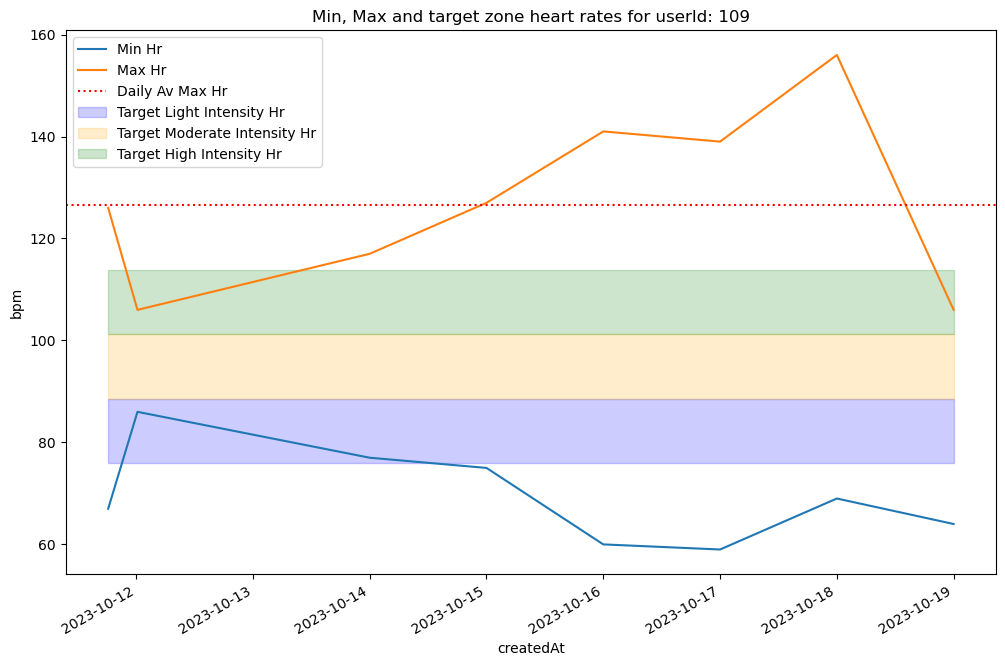

In [12]:
fitbit_df[(fitbit_df['user/id'] == specific_user_id)].sort_values('createdAt', ascending=False)[['createdAt', 'min_heart_rate', 'max_heart_rate']].set_index('createdAt').plot(figsize=(12, 8))

plt.axhline(y=average_max_hr, color = 'r', linestyle = 'dotted') 


# target zones
plt.fill_between(x=fitbit_df['createdAt'], y1=target_light_intensity_hr[0], y2=target_light_intensity_hr[1], alpha=0.2, color='b')
plt.fill_between(x=fitbit_df['createdAt'], y1=target_moderate_intensity_hr[0], y2=target_moderate_intensity_hr[1], alpha=0.2, color='orange')
plt.fill_between(x=fitbit_df['createdAt'], y1=target_high_intensity_hr[0], y2=target_high_intensity_hr[1], alpha=0.2, color='g')

plt.title(f'Min, Max and target zone heart rates for userId: {specific_user_id}')
plt.legend(['Min Hr', 'Max Hr', 'Daily Av Max Hr', 'Target Light Intensity Hr', 'Target Moderate Intensity Hr', 'Target High Intensity Hr'])
plt.ylabel('bpm')
plt.show()

In [13]:
#^ likely min hr is only recorded during activity so may seem high, and max hr should be above the target high intensity


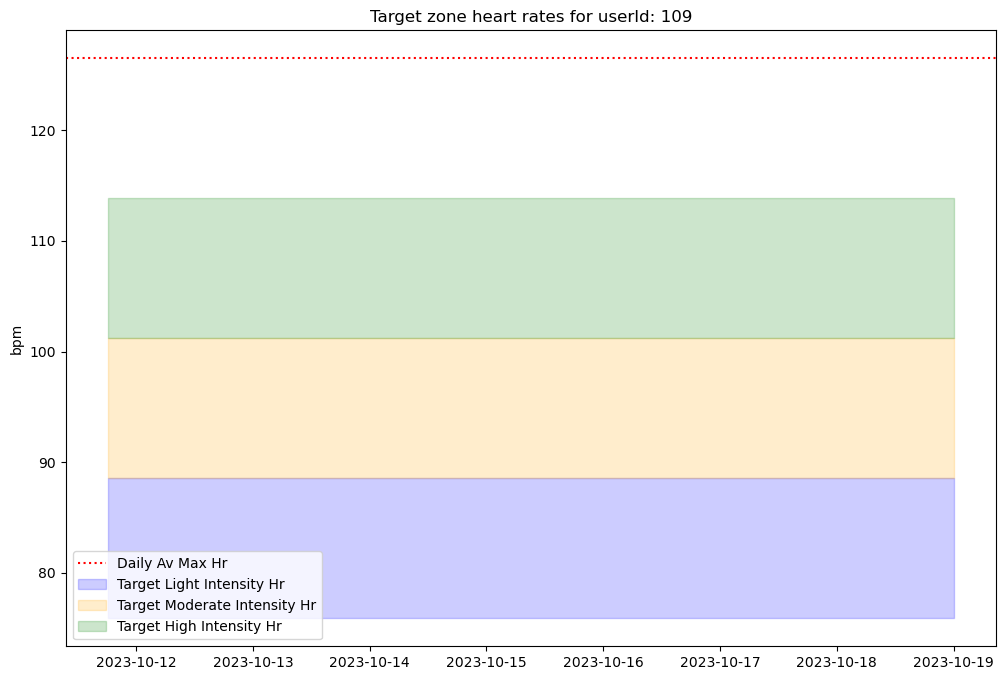

In [17]:
plt.figure(figsize=(12, 8))
plt.axhline(y=average_max_hr, color = 'r', linestyle = 'dotted') 
# target zones
plt.fill_between(x=fitbit_df['createdAt'], y1=target_light_intensity_hr[0], y2=target_light_intensity_hr[1], alpha=0.2, color='b')
plt.fill_between(x=fitbit_df['createdAt'], y1=target_moderate_intensity_hr[0], y2=target_moderate_intensity_hr[1], alpha=0.2, color='orange')
plt.fill_between(x=fitbit_df['createdAt'], y1=target_high_intensity_hr[0], y2=target_high_intensity_hr[1], alpha=0.2, color='g')

plt.title(f'Target zone heart rates for userId: {specific_user_id}')
plt.legend(['Daily Av Max Hr', 'Target Light Intensity Hr', 'Target Moderate Intensity Hr', 'Target High Intensity Hr'])
plt.ylabel('bpm')
plt.show()

In [18]:
target_light_intensity_hr, target_moderate_intensity_hr, target_high_intensity_hr

((75.89999999999999, 88.55), (88.55, 101.2), (101.2, 113.85000000000001))